In [1]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient



In [2]:
#Local variables: figure out how to automate.

JobIDint = 1405685
Clade = "birds"
JOBID = str(JobIDint)
tree_sizes_1 = list(range(10,605,5))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600]


In [4]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    hoffman2_path_output = '/u/home/m/mchari/bird/Parallel_Hoffman_full/' + Clade + '/'+ JOBID + '_output_files'
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

transfer is done


In [5]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

In [ ]:
#for some reason, only went until 430 

In [6]:
print(target_directory)
#look at one mpd randomization from one trial to see sample data structure. 
target_file_get = target_directory +  "100_3992out.csv"
print(target_file_get)
df = pd.read_csv(target_file_get)
df.index =['pd', 'mpd', "mntd"]
print(df)
#df.iloc[0]['mpd.rnd']

stat_temp = df.loc['mpd']
print(stat_temp)


/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/1405685_output_files/
/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/1405685_output_files/100_3992out.csv


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/1405685_output_files/100_3992out.csv'

In [7]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [8]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [9]:
#TODO: write this to a csv somehow so I can delete that massive file. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [10]:
#
new_mpd = new_mpd_smallvals
new_mntd = new_mntd_smallvals
new_pd = new_pd_smallvals

print(new_mpd)

{'mpd10': [97.2239595333333, 99.6066884444445, 111.042914977778, 108.311486244444, 68.3475464888889, 117.639629066667, 100.029660266667, 111.423764622222, 98.9834516666667, 109.750896533333, 112.380039977778, 85.3581442, 105.003512755556, 62.8974759777778, 81.1858478666667, 89.3535625777778, 94.9295944222222, 110.867574666667, 99.7822952666667, 108.047655888889, 104.701274933333, 92.5546849777778, 109.806838088889, 97.4546148, 95.5425967111111, 84.1438512666667, 82.4787149333333, 111.297533133333, 106.245355688889, 107.621225977778, 77.8261244, 108.254531111111, 92.3930776666667, 97.5796876222222, 96.4801789777778, 117.767788022222, 87.8081812, 99.8265774222222, 94.6955559555555, 90.7468220888889, 97.5318063555556, 109.752972888889, 86.0240518888889, 99.6522908444444, 109.256866422222, 104.773067911111, 105.446283622222, 102.8412102, 105.274804844444, 106.389867377778, 105.475629066667, 107.166125111111, 100.478345977778, 103.129322133333, 93.8153407777778, 100.170632333333, 111.558909

In [11]:
data = mpd['mpd10']
plt.hist(data, bins =30)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


#using classical statistics and assuming normal distribution 
std = statistics.stdev(data)
mean = np.mean(data)
lower_level = mean-1.960*(std/(np.sqrt(len(data)+1)))
lower_level
upper_level = mean+1.960*(std/(np.sqrt(len(data)+1)))
upper_level
#X  ±  Z s√n 


upper_bound_bootstrap = np.percentile(data,97.5)
lower_bound_bootstrap = np.percentile(data,2.5)

print(lower_bound_bootstrap, upper_bound_bootstrap)



NameError: name 'mpd' is not defined

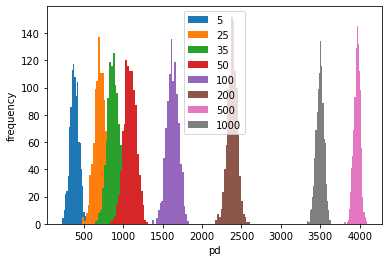

In [90]:
#print(dict_mpd.keys())
#print(np.mean(dict_mpd['mpd10']))
#print(np.mean(dict_mpd['mpd10']))
#print(new_mpd['mpd10'])
plt.hist(new_pd['pd10'],bins = 20)
#plt.hist(new_mpd['mpd10'],bins = 20)
#plt.hist(new_mpd['mpd15'],bins = 20)
#plt.hist(new_mpd['mpd20'],bins = 20)
plt.hist(new_pd['pd25'],bins = 20)
#plt.hist(new_mpd['mpd30'],bins = 20)
plt.hist(new_pd['pd35'],bins = 20)
#plt.hist(new_mpd['mpd40'],bins = 20)
#plt.hist(new_mpd['mpd45'],bins = 20)
plt.hist(new_pd['pd50'],bins = 20)
plt.hist(new_pd['pd100'],bins = 20)
plt.hist(new_pd['pd200'],bins = 20)
plt.hist(new_pd['pd500'],bins = 20)
plt.hist(new_pd['pd400'],bins = 20)
#plt.hist(new_mpd['mpd50'])
#plt.hist(new_mpd['mpd100'])
#plt.hist(new_mpd['mpd1000'])
#plt.title('expected pd histograms across multiple tree sizes')
plt.xlabel('pd')
plt.ylabel('frequency')
labels = ("5","25",  "35", "50", "100", "200", "500", "1000")
plt.legend(labels)
plt.savefig('pd_histograms.jpg', dpi=300)

In [12]:
#TODO: make function to get confidence interval and means. 
#CI TODO: check whether z or t is used. don't know variance or mean. Should use t distribution. 
def CI_conglomerate(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        mean_temp = np.mean(dictionary[key])
        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
        low_array.append(CI_temp[0])
        high_array.append(CI_temp[1])
        mean_array.append(mean_temp)
    return(low_array,high_array,mean_array)

new_CI = CI_conglomerate(new_mpd)
print(new_CI)

([99.21065630024069, 99.11665116289704, 99.31944421609282, 100.12918509758835, 100.12119017054462, 99.97092998774474, 99.7505413235905, 99.57636403343206, 99.71260255100135, 99.92633339343075, 100.01489372117776, 100.1498881352331, 100.01951177518447, 100.23262652828062, 100.16674394456524, 99.73877374899264, 100.20889815260402, 99.94482017111675, 100.04680905546157, 100.06626692977771, 100.08804571178077, 100.25647539347037, 100.11369446005966, 100.13764996837607, 99.93790658153249, 100.17792794453771, 100.11022104465471, 100.07177836449307, 100.1074892427552, 100.10657680184949, 100.06767579262795, 100.25248640918576, 100.34255051318108, 100.10276999075076, 100.2752183329133, 100.17413582145991, 100.26197158511748, 100.1610918494418, 100.30140873544757, 100.22205891206391, 100.09943162053433, 100.18616687690427, 100.15913586996427, 100.29048628351688, 100.19776350604639, 100.21574588569288, 100.24273794385813, 100.271226737001, 100.25715053980245, 100.20614006213405, 100.241785536647

In [14]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [15]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

mpd10
115.86181823499993
mpd15
114.1692665952381
mpd20
112.0574200189474
mpd25
111.04006182066699
mpd30
110.06860851517263
mpd35
108.73298773352957
mpd40
108.7255298658655
mpd45
107.51698169449458
mpd50
107.6650009778162
mpd55
107.5249238025928
mpd60
107.25823690707655
mpd65
106.87698728334135
mpd70
106.19621910076607
mpd75
106.31713691353146
mpd80
106.58393955862364
mpd85
105.7052216734596
mpd90
106.19526726562397
mpd95
105.42611940351618
mpd100
105.18535872688922
mpd105
105.04017271863557
mpd110
105.18151988817374
mpd115
105.18817191777305
mpd120
104.8313427370517
mpd125
104.99958268296736
mpd130
105.10946598988367
mpd135
104.71892828674378
mpd140
104.78346847575033
mpd145
104.60132764444927
mpd150
104.58298943723027
mpd155
104.67027654534952
mpd160
104.32156353548945
mpd165
104.34244151876575
mpd170
104.39452736692472
mpd175
103.94349659287687
mpd180
103.9036334520483
mpd185
103.65562383109284
mpd190
104.0972189237819
mpd195
103.52246527530487
mpd200
104.1450705808943
mpd205
103.697

In [54]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

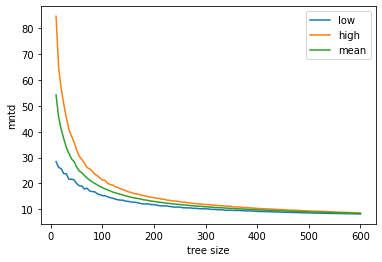

In [16]:
#print(average_mpd_rnd)

plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig('mntd_95CI_bird.jpg', dpi=300)



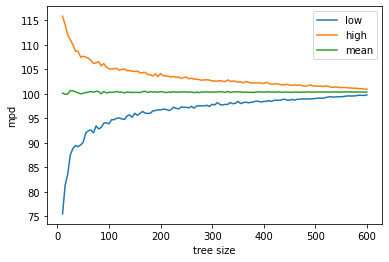

In [17]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.legend(labels2)
plt.savefig('mpd_95CI_bird.jpg', dpi=300)



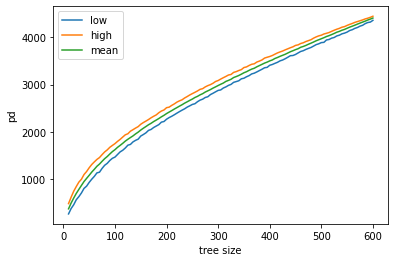

In [18]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.legend(labels2)
plt.savefig('pd_95CI_bird.jpg', dpi=1200)

In [17]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv("CI_mpd_output_bootstrap_bird.csv")


In [18]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv("CI_mntd_output_bootstrap_bird.csv")

In [19]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv("CI_pd_output_bootstrap_bird.csv")